In [1]:
import pandas as pd
import spacy
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [2]:
# loading English core and declaring tokenizer
nlp = spacy.load('en_core_web_sm')
tokenizer = nlp.tokenizer

In [3]:
# stopword removing
def remove_stopwords(doc):
    tokens = [token.text for token in doc if not token.is_stop]
    return ' '.join(tokens)

In [4]:
#ROC-AUC
def roc_auc(y_t, y_pred):
    auc = roc_auc_score(y_t, y_pred)
    fpr, tpr, threshold = roc_curve(y_t, y_pred)
    return auc, fpr, tpr

In [22]:
def ml_models(X_trn, X_tst, y_trn, y_tst):
    # decision tree
    dt_classifier = DecisionTreeClassifier()
    dt_classifier.fit(X_trn, y_trn)
    dt_predictions = dt_classifier.predict(X_tst)
    dt_report = classification_report(y_tst, dt_predictions)
    dt_confusion_matrix = confusion_matrix(y_tst, dt_predictions)
    print('DECISION TREE')
    print('Classification Report:')
    print(dt_report)
    print('Confusion Matrix:')
    print(dt_confusion_matrix)
    print('\n')

    # random forest
    rf_classifier = RandomForestClassifier(n_estimators = 10)
    rf_classifier.fit(X_trn, y_trn)
    rf_predictions = rf_classifier.predict(X_tst)
    rf_report = classification_report(y_tst, rf_predictions)
    rf_confusion_matrix = confusion_matrix(y_tst, rf_predictions)
    print('RANDOM FOREST')
    print('Classification Report:')
    print(rf_report)
    print('Confusion Matrix:')
    print(rf_confusion_matrix)
    print('\n')

    # naive bayes
    nb_classifier = MultinomialNB()
    nb_classifier.fit(X_trn, y_trn)
    nb_predictions = nb_classifier.predict(X_tst)
    nb_report = classification_report(y_tst, nb_predictions)
    nb_confusion_matrix = confusion_matrix(y_tst, nb_predictions)
    print('NAIVE BAYES')
    print('Classification Report:')
    print(nb_report)
    print('Confusion Matrix:')
    print(nb_confusion_matrix)
    print('\n')

    # KNN
    knn_classifier = KNeighborsClassifier()
    knn_classifier.fit(X_trn, y_trn)
    knn_predictions = knn_classifier.predict(X_tst)
    knn_report = classification_report(y_tst, knn_predictions)
    knn_confusion_matrix = confusion_matrix(y_tst, knn_predictions)
    print('KNN')
    print('Classification Report:')
    print(knn_report)
    print('Confusion Matrix:')
    print(knn_confusion_matrix)
    print('\n')

    # SVM
    svm_classifier = SVC()
    svm_classifier.fit(X_trn, y_trn)
    svm_predictions = svm_classifier.predict(X_tst)
    svm_report = classification_report(y_tst, svm_predictions)
    svm_confusion_matrix = confusion_matrix(y_tst, svm_predictions)
    print('SVM')
    print('Classification Report:')
    print(svm_report)
    print('Confusion Matrix:')
    print(svm_confusion_matrix)
    print('\n')

    knn_auc, Knn_fpr, knn_tpr = roc_auc(y_tst, knn_predictions)
    nb_auc, nb_fpr, nb_tpr = roc_auc(y_tst, nb_predictions)
    rf_auc, rf_fpr, rf_tpr = roc_auc(y_tst, rf_predictions)
    dt_auc, dt_fpr, dt_tpr = roc_auc(y_tst, dt_predictions)
    svm_auc, svm_fpr, svm_tpr = roc_auc(y_tst, svm_predictions)

    plt.plot(Knn_fpr, knn_tpr, label=f'KNN_AUC = {knn_auc:.2f}')
    plt.plot(nb_fpr, nb_tpr, label=f'Naive_Bayes_AUC = {nb_auc:.2f}')
    plt.plot(rf_fpr, rf_tpr, label=f'Random_Forest_AUC = {rf_auc:.2f}')
    plt.plot(dt_fpr, dt_tpr, label=f'Decision_Trees_AUC = {dt_auc:.2f}')
    plt.plot(svm_fpr, svm_tpr, label=f'SVM_AUC = {svm_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print('\n')

In [6]:
# loading tweet dataset
tweets_df = pd.read_csv('FinalBalancedDataset.csv')
tweets_df

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


In [7]:
# getting sample size
sample_size = int(input('Please specify the sample size: '))

Please specify the sample size: 1000


In [8]:
# selecting the samples 
tweet_df = tweets_df.sample(n = sample_size,random_state= 42)
tweet_df

,Unnamed: 0,Toxicity,tweet
44200,44200,1,Kim K is alright but honestly so many niggas b...
46339,46339,0,RT @BigJonBul: The stars wink knowingly and sm...
49169,49169,1,RT @Sassymermaidxo: &#8220;@VSamone: &#8220;@Z...
54130,54130,1,"Those ""tell me about yourself "" lookin ass nig..."
18801,18801,0,4 days ago ... to celebrate #national iced tea...
...,...,...,...
25512,25512,0,@user @user @user @user i thought they eloped...
55565,55565,1,based god fucked all my bitches
34658,34658,1,@Brutal_Brandy We had a Pacer in the 70s &amp;...
24851,24851,0,@user @user so now roseanne is walking back he...


In [9]:
# replace special character with a space
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ', x))

In [10]:
# replace more than one space with single space
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: re.sub(r'\s+', ' ', x))

In [11]:
# remove digits
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: re.sub(r'\d', '', x))

In [12]:
# strip space at the begining of the line
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: x.lstrip(' '))

In [13]:
# making words to lowercase
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: x.lower())

In [14]:
# Tokenize the sentence
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: tokenizer(x))

In [15]:
# remove stopwords
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: remove_stopwords(x))

In [16]:
tweet_df

,Unnamed: 0,Toxicity,tweet
44200,44200,1,kim k alright honestly niggas d miley got unfo...
46339,46339,0,rt bigjonbul stars wink knowingly smile lovers...
49169,49169,1,rt sassymermaidxo vsamone zvckslvtr sister...
54130,54130,1,tell lookin ass niggas m crazy bitch s need know
18801,18801,0,days ago celebrate national iced tea day starb...
...,...,...,...
25512,25512,0,user user user user thought eloped mazeltov to...
55565,55565,1,based god fucked bitches
34658,34658,1,brutal brandy pacer s amp member loving hair d...
24851,24851,0,user user roseanne walking endorsement racist ...


In [17]:
# Features and target variable
X = tweet_df['tweet']
y = tweet_df['Toxicity']

In [18]:
# Bag of words vectorizer
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(X.astype(str))

# TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X.astype(str))

In [19]:
# Split the dataset into training and testing sets
X_bow_train, X_bow_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_tfidf_train, X_tfidf_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

BAG OF WORDS


DECISION TREE
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       116
           1       0.87      0.82      0.85        84

    accuracy                           0.88       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.88      0.87       200

Confusion Matrix:
[[106  10]
 [ 15  69]]


RANDOM FOREST
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       116
           1       0.94      0.75      0.83        84

    accuracy                           0.88       200
   macro avg       0.89      0.86      0.87       200
weighted avg       0.88      0.88      0.87       200

Confusion Matrix:
[[112   4]
 [ 21  63]]


NAIVE BAYES
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       116
           1       0.77    

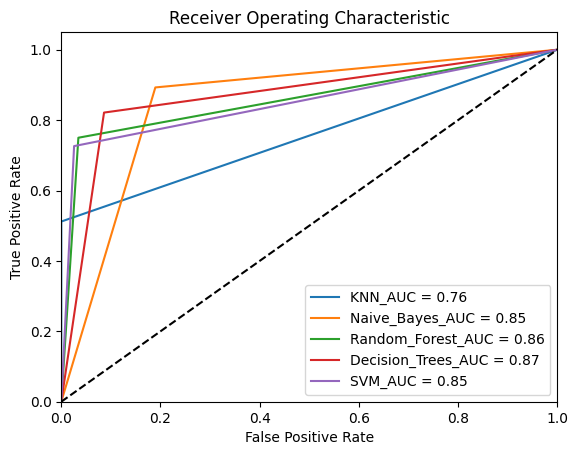

In [23]:
# Bag of Words - classifications
print('BAG OF WORDS')
print('\n')
ml_models(X_bow_train, X_bow_test, y_train, y_test)

TF-IDF


DECISION TREE
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       116
           1       0.92      0.81      0.86        84

    accuracy                           0.89       200
   macro avg       0.90      0.88      0.88       200
weighted avg       0.89      0.89      0.89       200

Confusion Matrix:
[[110   6]
 [ 16  68]]


RANDOM FOREST
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       116
           1       0.94      0.76      0.84        84

    accuracy                           0.88       200
   macro avg       0.89      0.86      0.87       200
weighted avg       0.89      0.88      0.88       200

Confusion Matrix:
[[112   4]
 [ 20  64]]


NAIVE BAYES
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       116
           1       0.84      0.85

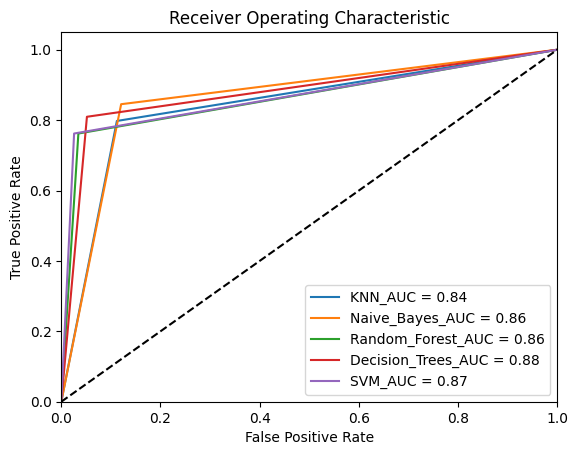

In [24]:
# TF-IDF - classifications
print('TF-IDF')
print('\n')
ml_models(X_tfidf_train, X_tfidf_test, y_train, y_test)